# Decaying isomerization

The decaying isomerization process is the reversible interconversion of two isometric species $S_1$ and $S_2$ combined with the (typically much slower) decay of $S_2$ to a third spcies $S_3$:

$$ S_1 \leftrightarrows S_2 \qquad k_\text{forward} = c_1, k_\text{reverse} = c_2$$
$$ S_2 \to S_3 \qquad k = c_3 $$

As Rathinam [Rathinam 2003] and Gillespie [Gillespie 2008] note, for appropriately chosen parameters, the decaying isomerization problem is the simplest example of a "stiff" problem in chemical kinetics.

In the reversible isomerization process $ S_1 \leftrightarrows S_2$ alone, the random variable describing the number of $S_2$ specimens at equilibrium ($t \to \infty$) is:

$$ P(\# S_2 = x_2) = \text{Binomial}\left(\frac{c1}{c1 + c2}; x_T\right) (x_2) $$

where $x_T$ is the total inital specimens of $S_1$ and $S_2$ combined. (Gillespie 2008).

The relaxation time is defined as the characteristic time for the exponential approach of a perturbed system to its equilibrium. (The characteristic time being the time it takes for the exponential function to be reduced to a fraction $1/e$ of itself.)

In [60]:
from reactionmodel.model import Species, Reaction, Model
from hybrid.gillespie import GillespieSimulator

S1 = Species('S1')
S2 = Species('S2')
S3 = Species('S3')

reactions = [
    Reaction([S1], [S2], k='c1'),
    Reaction([S2], [S1], k='c2')
]

m = Model([S1, S2], reactions)

reactions.append(
    Reaction([S2], [S3], k='c3')
)

m_decay = Model([S1, S2, S3], reactions)

p = {'c1': 1, 'c2':1}
p_decay = {'c1': 1.0, 'c2': 2.0, 'c3': 5 * 1e-5} # gillespie 2008 figure 5

t_span = [0.0, 20000]

ic = m_decay.make_initial_condition({'S1': 1200, 'S2': 600, 'S3':0})

In [61]:
g_s = GillespieSimulator(
    m_decay.get_k(parameters=p_decay, jit=True),
    m_decay.stoichiometry(),
    m_decay.kinetic_order(),
)

Evaluating expression: c1 => 1.0
Evaluating expression: c2 => 2.0
Evaluating expression: c3 => 5e-05


In [ ]:
import numpy as np
#result = g_s.simulate(t_span, ic, np.random.default_rng())
#result.plot(m_decay.legend())

In [63]:
from hybrid.tau import TauLeapSimulator

t_s = TauLeapSimulator(
    m_decay.get_k(parameters=p_decay, jit=True),
    m_decay.stoichiometry(),
    m_decay.kinetic_order(),
    epsilon=0.1
)

Evaluating expression: c1 => 1.0
Evaluating expression: c2 => 2.0
Evaluating expression: c3 => 5e-05


In [70]:
result = t_s.simulate(t_span, ic, np.random.default_rng())

/Users/thayer/develop/hybrid/hybrid/tau.py:191: RuntimeWarning: invalid value encountered in divide
  tau1 = np.min(np.maximum(np.nan_to_num(y * epsilon / g, 0), 1) / np.abs(mu_hat_i))
/Users/thayer/develop/hybrid/hybrid/tau.py:191: RuntimeWarning: divide by zero encountered in divide
  tau1 = np.min(np.maximum(np.nan_to_num(y * epsilon / g, 0), 1) / np.abs(mu_hat_i))
/Users/thayer/develop/hybrid/hybrid/tau.py:192: RuntimeWarning: invalid value encountered in divide
  tau2 = np.min(np.maximum(np.nan_to_num(y * epsilon / g, 0), 1)**2 / np.abs(sigma_2_hat_i))
/Users/thayer/develop/hybrid/hybrid/tau.py:149: RuntimeWarning: divide by zero encountered in divide
  2 + 1/(y-1),
/Users/thayer/develop/hybrid/hybrid/tau.py:155: RuntimeWarning: divide by zero encountered in divide
  3/2 * (2 + 1/(y-1)),
/Users/thayer/develop/hybrid/hybrid/tau.py:161: RuntimeWarning: divide by zero encountered in divide
  3 + 1/(y-1) + 1/(y-2),
/Users/thayer/develop/hybrid/hybrid/tau.py:191: RuntimeWarning: overfl

Counter({<TauStepStatus.leap: 0>: 28977})

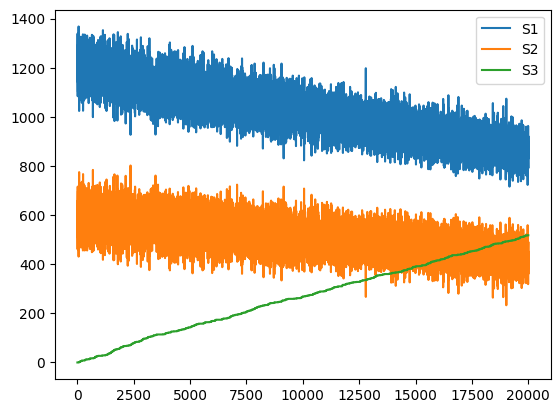

In [71]:
result.plot(m_decay.legend())
result.status_counter

In [72]:
from hybrid.hybrid import HybridSimulator, FixedThresholdPartitioner

h_s = HybridSimulator(
    m_decay.get_k(parameters=p_decay, jit=True),
    m_decay.stoichiometry(),
    m_decay.kinetic_order(),
    FixedThresholdPartitioner(100.0),
)

Evaluating expression: c1 => 1.0
Evaluating expression: c2 => 2.0
Evaluating expression: c3 => 5e-05


<Axes: >

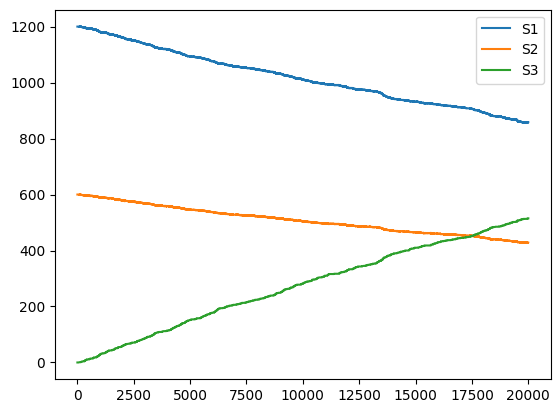

In [73]:
result = h_s.simulate([0.0, 20000], ic, np.random.default_rng())
result.plot(m_decay.legend())


## Hybrid worst case

In [25]:
p = {'c1': 1, 'c2':1, 'c3': 0.1}
ic = m_decay.make_initial_condition({'S1': 150, 'S2': 150})

h_s = HybridSimulator(
    m_decay.get_k(parameters=p, jit=True),
    m_decay.stoichiometry(),
    m_decay.kinetic_order(),
    FixedThresholdPartitioner(100.0),
)

Evaluating expression: c1 => 1.0
Evaluating expression: c2 => 1.0
Evaluating expression: c3 => 0.1


<Axes: >

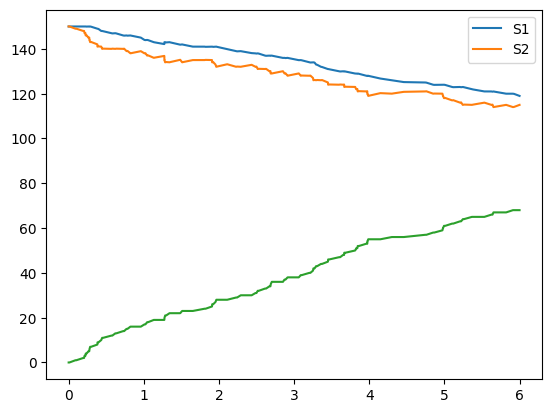

In [35]:
result = h_s.simulate([0.0, 6.0], ic, np.random.default_rng())
result.plot(m.legend())


In [36]:
t_s = TauLeapSimulator(
    m_decay.get_k(parameters=p, jit=True),
    m_decay.stoichiometry(),
    m_decay.kinetic_order(),
    epsilon=0.1
)

Evaluating expression: c1 => 1.0
Evaluating expression: c2 => 1.0
Evaluating expression: c3 => 0.1


/Users/thayer/develop/hybrid/hybrid/tau.py:191: RuntimeWarning: invalid value encountered in divide
  tau1 = np.min(np.maximum(np.nan_to_num(y * epsilon / g, 0), 1) / np.abs(mu_hat_i))
/Users/thayer/develop/hybrid/hybrid/tau.py:191: RuntimeWarning: divide by zero encountered in divide
  tau1 = np.min(np.maximum(np.nan_to_num(y * epsilon / g, 0), 1) / np.abs(mu_hat_i))
/Users/thayer/develop/hybrid/hybrid/tau.py:192: RuntimeWarning: invalid value encountered in divide
  tau2 = np.min(np.maximum(np.nan_to_num(y * epsilon / g, 0), 1)**2 / np.abs(sigma_2_hat_i))
/Users/thayer/develop/hybrid/hybrid/tau.py:149: RuntimeWarning: divide by zero encountered in divide
  2 + 1/(y-1),
/Users/thayer/develop/hybrid/hybrid/tau.py:155: RuntimeWarning: divide by zero encountered in divide
  3/2 * (2 + 1/(y-1)),
/Users/thayer/develop/hybrid/hybrid/tau.py:161: RuntimeWarning: divide by zero encountered in divide
  3 + 1/(y-1) + 1/(y-2),
/Users/thayer/develop/hybrid/hybrid/tau.py:192: RuntimeWarning: divide

<Axes: >

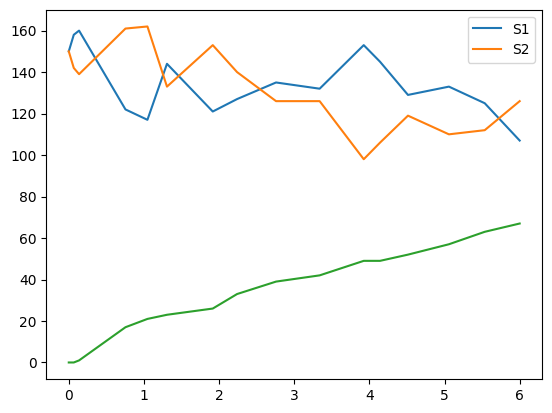

In [38]:
result = t_s.simulate([0.0, 6.0], ic, np.random.default_rng())
result.plot(m.legend())


# Immigration + linear death process

In [74]:
from reactionmodel.model import Species, Reaction, Model
from hybrid.gillespie import GillespieSimulator

S1 = Species('S1')

reactions = [
    Reaction([S1], [], k='r'),
    Reaction([], [S1], k='p')
]

m = Model([S1], reactions)

p = {'r': 1, 'p':100}

s = GillespieSimulator(
    m.get_k(parameters=p, jit=True),
    m.stoichiometry(),
    m.kinetic_order(),
)

Evaluating expression: r => 1.0
Evaluating expression: p => 100.0


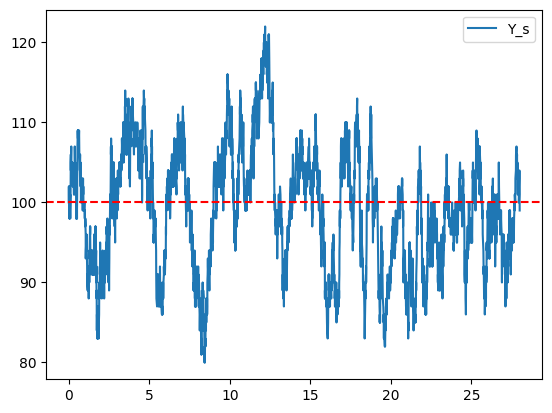

In [80]:
import numpy as np
result = s.simulate([0.0, 28.0], m.make_initial_condition({'S1': 100}), np.random.default_rng())
ax = result.plot(['Y_s'])
ax.axhline(100, color='r', linestyle='dashed')

In [10]:
import matplotlib.pyplot as plt
#plt.hist(result.y_history)

In [11]:
import pandas as pd
r = pd.DataFrame(data={'S': np.squeeze(result.y_history.T)})
r

,S
0,100.0
1,101.0
2,100.0
3,101.0
4,100.0
...,...
601129,99.0
601130,100.0
601131,101.0
601132,100.0


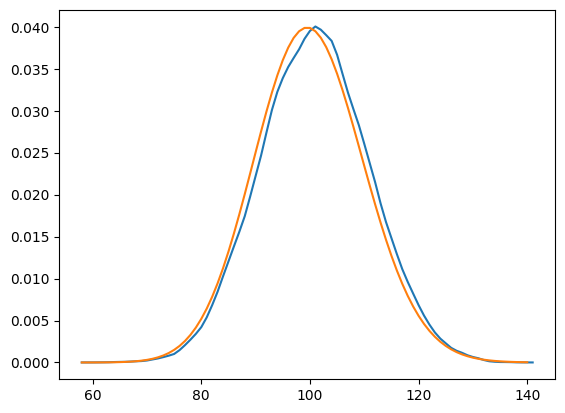

In [12]:
import scipy.stats

ax = plt.subplot()
x = np.arange(r.min().iloc[0], r.max().iloc[0])

ax.plot([x[0] for x in r.value_counts(normalize=True).sort_index().index.to_numpy()], r.value_counts(normalize=True).sort_index().to_numpy())
#ax = r.value_counts(normalize=True).sort_index().plot()

rv = scipy.stats.poisson(p['p']/p['c1'])
ax.plot(x, rv.pmf(x))

# Simple experiment idea:

Let's say you have a latent reservoir of size $n$ with variance $v$. As a function of the variance in the reservoir size, how much variance is there in the time until you hit exponential growth? How much variation is there in the re-seeded latent reservoir after a phase of $R_0$ that lasts for $t$ days?

=> how does this translate to your conclusions about probability of mutant emergence given a set standard?
=> how 

In [46]:
# slightly different: suppose you have fixed $n$ mutants vs Poiss(n) mutants. What do the growth curves look like once you release them to exp growth?
# if they then start growing deterministically and exponentially with rate 
n = 100
a = 1.0
R0 = 2.0
scipy.stats.poisson(n).rvs()

91

In [44]:
t = np.linspace(0.0, 10.0, 100)
for i in range(100):
    x = scipy.stats.poisson(n).rvs(1)
    y = x * np.exp()

TypeError: exp() takes from 1 to 2 positional arguments but 0 were given

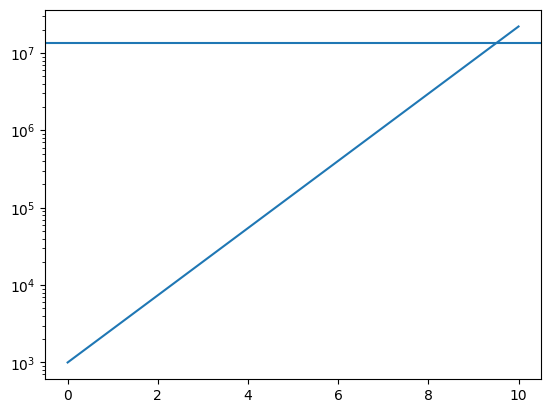

In [58]:
ax = plt.subplot()
ax.plot(t, 1000*np.exp(t*a*(R0-1)))
ax.semilogy()
ax.axhline(13.5*10**6)